In [1]:
#1 Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as mp
import scipy.stats as st

In [2]:
#1 Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [3]:
#1 Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [4]:
#1 
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [5]:
#1
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [6]:
#1 Combine the data into a single DataFrame
all_data = pd.merge(study_results, mouse_metadata, how ='left', on = ['Mouse ID'])

In [7]:
#1 Display the data table for preview
all_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [8]:
#2 Checking the number of mice.
all_data['Mouse ID'].nunique()

249

In [9]:
#3 Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated = all_data[all_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep= False)]['Mouse ID'].unique()
duplicated

array(['g989'], dtype=object)

In [10]:
#4 Optional: Get all the data for the duplicate mouse ID. 
all_data.loc[all_data['Mouse ID']=='g989']

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [11]:
#5 Create a clean DataFrame by dropping the duplicate mouse by its ID.
all_data = all_data[all_data['Mouse ID'] != 'g989']


In [12]:
#5 Create a clean DataFrame by dropping the duplicate mouse by its ID.
all_data = all_data[all_data['Mouse ID'] != 'g989']
all_data['Mouse ID'].nunique()
all_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [13]:
#6 Checking the number of mice in the clean DataFrame.
all_data['Mouse ID'].nunique()

248

## Summary Statistics

In [14]:
#7 Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


In [15]:
#7 mean
mean= all_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [16]:
#7 median
median= all_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [17]:
#7 variance
variance= all_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
variance

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [18]:
#7 standard deviation
std= all_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
std

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [19]:
#7 SEM
sem= all_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

In [20]:
#7 Assemble the resulting series into a single summary DataFrame.

statistics = pd.DataFrame({
    'Mean Tumor': mean,
    'Median Tumor Size': median,
    'Variance': variance,
    "Standard Deviation": std,
    "SEM": sem
})
statistics

,Mean Tumor,Median Tumor Size,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [21]:
#8 A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line

all_data.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

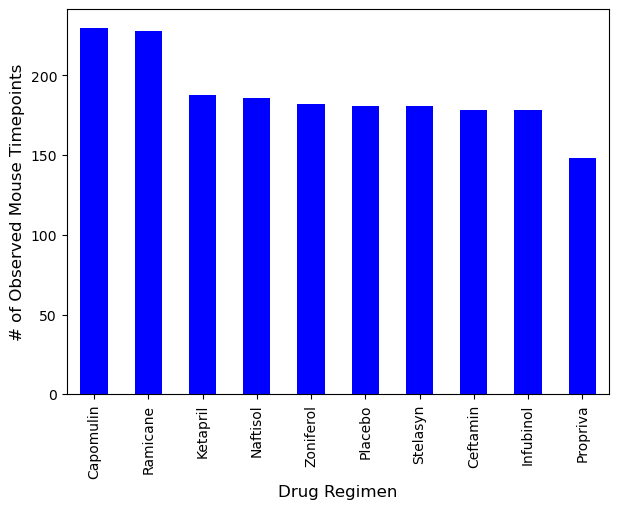

In [22]:
#9 Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_counts = all_data.groupby('Drug Regimen')['Timepoint'].count()
drug_counts = drug_counts.sort_values(ascending=False)

ax = drug_counts.plot(kind="bar", figsize=(7, 5), color="blue", fontsize=10)
ax.set_xlabel("Drug Regimen", fontsize=12)
ax.set_ylabel("# of Observed Mouse Timepoints", fontsize=12)
plt.show()

In [23]:
#10 Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_counts = all_data.groupby('Drug Regimen')['Timepoint'].count()
drug_counts = drug_counts.reset_index().rename(columns={'Timepoint': '# of Observed Mouse Timepoints'})
drug_counts = drug_counts.sort_values(by='# of Observed Mouse Timepoints', ascending=False)

drug_counts

,Drug Regimen,# of Observed Mouse Timepoints
0,Capomulin,230
7,Ramicane,228
3,Ketapril,188
4,Naftisol,186
9,Zoniferol,182
5,Placebo,181
8,Stelasyn,181
1,Ceftamin,178
2,Infubinol,178
6,Propriva,148


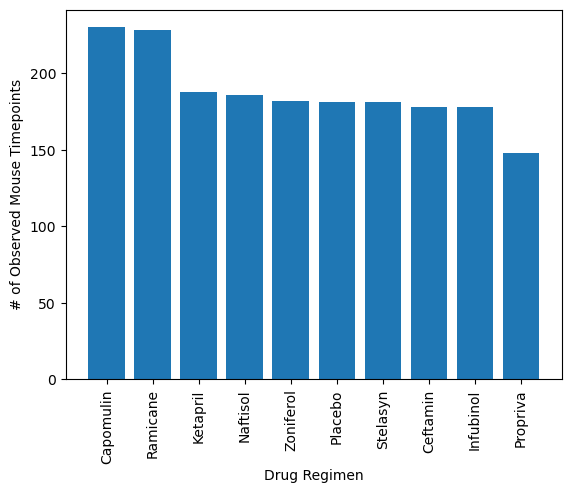

In [24]:
#10 Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_value = drug_counts['Drug Regimen']
label = drug_counts['# of Observed Mouse Timepoints']

plt.bar(x_value, label)

plt.xlabel('Drug Regimen')
plt.xticks(rotation='vertical')
plt.ylabel('# of Observed Mouse Timepoints')

plt.show()

<AxesSubplot:ylabel='Sex'>

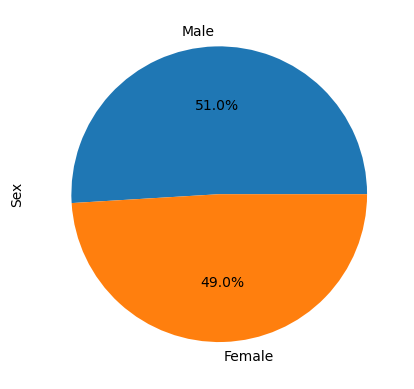

In [25]:
#11 Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_counts = all_data['Sex'].value_counts()

sex_counts.plot(kind='pie', autopct='%1.1f%%')


In [26]:
#12 Generate a pie plot showing the distribution of female versus male mice using pyplot
sexes = all_data['Sex'].value_counts()
sexes

Male      958
Female    922
Name: Sex, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

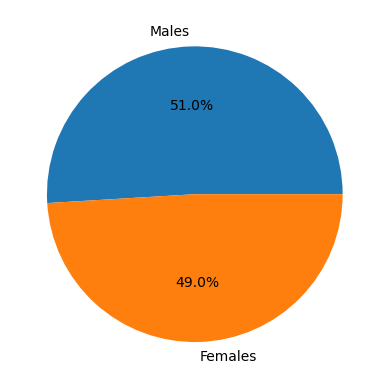

In [27]:
#12 Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Males', 'Females']
sizes = [958, 922]
colors = ['blue', 'orange']

plt.pie(sizes, labels = labels, autopct = '%1.1f%%')
plt.show

## Quartiles, Outliers and Boxplots

In [28]:
#13 Calculate the final tumor volume of each mouse across four of the treatment regimens:  
#13 Capomulin, Ramicane, Infubinol, and Ceftamin

#13 Start by getting the last (greatest) timepoint for each mouse


#13 Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

In [29]:
#13 Start by getting the last (greatest) timepoint for each mouse

last_time = all_data.groupby(['Drug Regimen','Mouse ID'])['Timepoint'].max()
last_time = last_time.reset_index().rename(columns={'Timepoint': 'Last Timepoint'})

last_time

,Drug Regimen,Mouse ID,Last Timepoint
0,Capomulin,b128,45
1,Capomulin,b742,45
2,Capomulin,f966,20
3,Capomulin,g288,45
4,Capomulin,g316,45
...,...,...,...
243,Zoniferol,q633,45
244,Zoniferol,s337,45
245,Zoniferol,w140,5
246,Zoniferol,w575,45


In [30]:
#13 Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_time= pd.merge(last_time, all_data, how= 'left')
last_time

,Drug Regimen,Mouse ID,Last Timepoint,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
0,Capomulin,b128,45,0,45.000000,0,Female,9,22
1,Capomulin,b128,45,5,45.651331,0,Female,9,22
2,Capomulin,b128,45,10,43.270852,0,Female,9,22
3,Capomulin,b128,45,15,43.784893,0,Female,9,22
4,Capomulin,b128,45,20,42.731552,0,Female,9,22
...,...,...,...,...,...,...,...,...,...
1875,Zoniferol,w575,45,45,68.401286,3,Female,16,28
1876,Zoniferol,x613,15,0,45.000000,0,Female,2,29
1877,Zoniferol,x613,15,5,46.097041,0,Female,2,29
1878,Zoniferol,x613,15,10,46.818176,0,Female,2,29


In [31]:
#13 Capomulin, Ramicane, Infubinol, and Ceftamin
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
drugs_filtered = last_time[last_time['Drug Regimen'].isin(treatments)]
drugs_filtered

,Drug Regimen,Mouse ID,Last Timepoint,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
0,Capomulin,b128,45,0,45.000000,0,Female,9,22
1,Capomulin,b128,45,5,45.651331,0,Female,9,22
2,Capomulin,b128,45,10,43.270852,0,Female,9,22
3,Capomulin,b128,45,15,43.784893,0,Female,9,22
4,Capomulin,b128,45,20,42.731552,0,Female,9,22
...,...,...,...,...,...,...,...,...,...
1512,Ramicane,z578,45,25,37.414114,0,Male,11,16
1513,Ramicane,z578,45,30,37.815935,0,Male,11,16
1514,Ramicane,z578,45,35,38.504824,0,Male,11,16
1515,Ramicane,z578,45,40,34.022093,0,Male,11,16


In [32]:
#14 Put treatments into a list for for loop (and later for plot labels)
#14  Create empty list to fill with tumor vol data (for plotting)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_volume = []

for treatment in treatments:
    last_call = drugs_filtered[drugs_filtered['Drug Regimen']== treatment]
        
    time_point = last_call.groupby('Mouse ID')['Timepoint'].max()

    final_tumor_volume = pd.merge(time_point, last_call, on=['Mouse ID', 'Timepoint'])['Tumor Volume (mm3)']

    
    tumor_volume.append(final_tumor_volume)

final_tumor_volume = pd.DataFrame(tumor_volume).transpose()
final_tumor_volume.columns = treatments

final_tumor_volume

,Capomulin,Ramicane,Infubinol,Ceftamin
0,38.982878,38.407618,67.973419,62.999356
1,38.939633,43.047543,65.525743,45.000000
2,30.485985,38.810366,57.031862,56.057749
3,37.074024,32.978522,66.083066,55.742829
4,40.159220,38.342008,72.226731,48.722078
5,47.685963,33.397653,36.321346,47.784682
6,37.311846,37.311236,60.969711,61.849023
7,38.125164,40.659006,62.435404,68.923185
8,38.753265,29.128472,60.918767,67.748662
9,41.483008,33.562402,67.289621,57.918381


In [33]:
#14 Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
outliers = []

for drug in treatments:
    # tumor volume data for the current drug
    volumes = final_tumor_volume[drug]
    
    # Get quartiles and IQR
    q1 = volumes.quantile(0.25)
    q3 = volumes.quantile(0.75)
    iqr = q3 - q1
    
    # Get lower and upper bounds for outliers
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    
    # Find  potential outliers
    outliers_mask = (volumes < lower_bound) | (volumes > upper_bound)
    drug_outliers = volumes[outliers_mask]
    
    # Append results with the list of outliers
    outliers.append({
        'Treatment': drug,
        'First Quartile': q1,
        'Third Quartile': q3,
        'IQR': iqr,
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Minimum': volumes.min(),
        'Maximum': volumes.max(),
        'Median': volumes.median(),
        'Outliers': drug_outliers
    })

outliers = pd.DataFrame(outliers)
outliers

,Treatment,First Quartile,Third Quartile,IQR,Lower Bound,Upper Bound,Minimum,Maximum,Median,Outliers
0,Capomulin,32.377357,40.159220,7.781863,20.704562,51.832015,23.343598,47.685963,38.125164,"Series([], Name: Capomulin, dtype: float64)"
1,Ramicane,31.560470,40.659006,9.098537,17.912664,54.306811,22.050126,45.220869,36.561652,"Series([], Name: Ramicane, dtype: float64)"
2,Infubinol,54.048608,65.525743,11.477135,36.832905,82.741446,36.321346,72.226731,60.165180,"5 36.321346 Name: Infubinol, dtype: float64"
3,Ceftamin,48.722078,64.299830,15.577752,25.355450,87.666458,45.000000,68.923185,59.851956,"Series([], Name: Ceftamin, dtype: float64)"


In [34]:
#14
outliers_grouped = outliers.groupby('Treatment')['Outliers'].agg(list)
outliers_grouped

Treatment
Capomulin              [[]]
Ceftamin               [[]]
Infubinol    [[36.3213458]]
Ramicane               [[]]
Name: Outliers, dtype: object

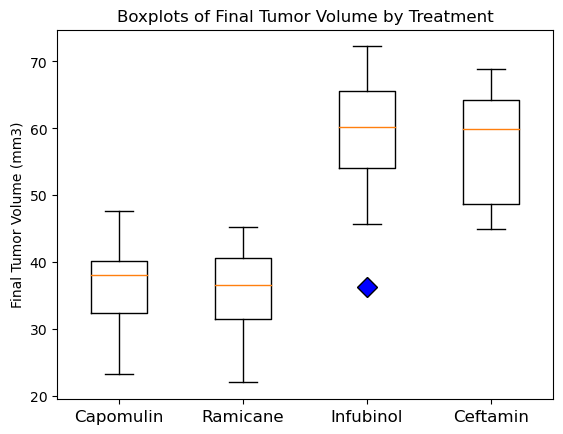

In [35]:
#14
cap_data = final_tumor_volume['Capomulin']
ram_data = final_tumor_volume['Ramicane']
inf_data = final_tumor_volume['Infubinol']
cef_data = final_tumor_volume['Ceftamin']
data = [cap_data, ram_data, inf_data, cef_data]
fig, ax = plt.subplots()
flierprops = dict(marker='D', markerfacecolor='b', markersize=10)
# Use ax.boxplot() to apply the flierprops
ax.boxplot(data, flierprops=flierprops)
ax.set_xticklabels(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'], fontsize=12)
ax.set_ylabel('Final Tumor Volume (mm3)')
ax.set_title('Boxplots of Final Tumor Volume by Treatment')
plt.show()

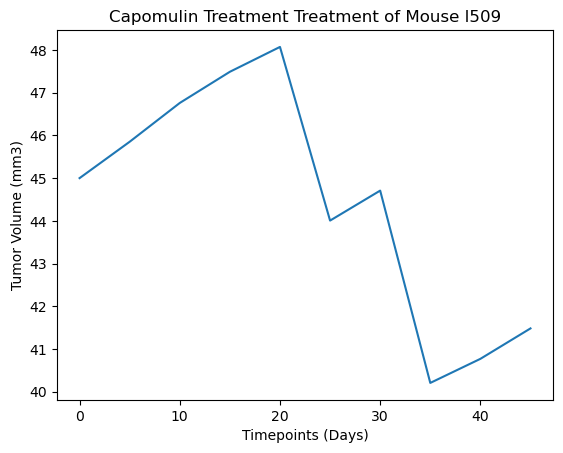

In [36]:
#16 Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
single_mouse = all_data.loc[(all_data['Drug Regimen'] == 'Capomulin') & (all_data['Mouse ID'] == 'l509')]

plt.plot(single_mouse['Timepoint'], single_mouse['Tumor Volume (mm3)'])

plt.xlabel('Timepoints (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Treatment Treatment of Mouse l509')
plt.show()

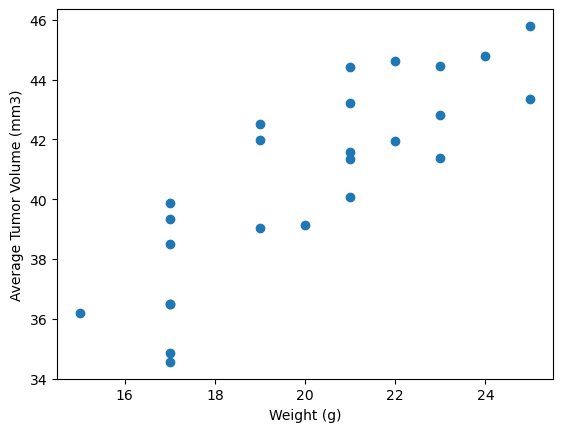

In [37]:
#17 Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = all_data.loc[all_data['Drug Regimen'] == 'Capomulin']
cap_avg = capomulin_data.groupby(['Mouse ID']).mean()

plt.scatter(cap_avg['Weight (g)'],cap_avg['Tumor Volume (mm3)'])

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()

In [38]:
#18 Calculate the correlation coefficientfor mouse weight and average observed tumor volume for the entire Capomulin regimen
corr=cap_avg['Weight (g)'].corr(cap_avg['Tumor Volume (mm3)'])
corr= round(corr, 2)

print(f"The correlation between mouse weight and average tumor volume is {corr}")


The correlation between mouse weight and average tumor volume is 0.84


In [39]:
#18 linear regression model for mouse weight and average observed tumor volume for the entire Capomulin regimen
import scipy.stats as st

lineregress=st.linregress(cap_avg['Weight (g)'], cap_avg['Tumor Volume (mm3)'])
lineregress

LinregressResult(slope=0.9544396890241048, intercept=21.552160532685008, rvalue=0.8419363424694721, pvalue=1.3225722434712404e-07, stderr=0.12754359033201323, intercept_stderr=2.5909876867683455)

In [40]:
#18
x_values = cap_avg['Weight (g)']
y_values = cap_avg['Tumor Volume (mm3)']

slope, intercept, rvalue, pvalue, stderr = st.linregress(cap_avg['Weight (g)'], cap_avg['Tumor Volume (mm3)'])


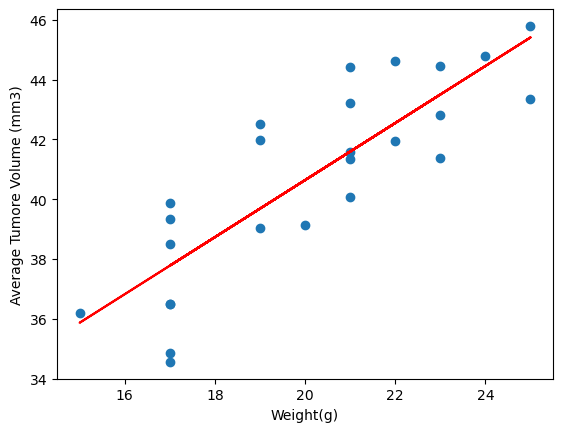

In [41]:
#18 Plot the linear regression model on top of the previous scatter plot.

y_predict = slope *(cap_avg['Weight (g)'])+intercept

plt.scatter(cap_avg['Weight (g)'],cap_avg['Tumor Volume (mm3)'])

plt.plot(cap_avg['Weight (g)'], y_predict, 'r'.format(slope,intercept))

plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')

plt.show()


In [42]:
#14 an example of how much time a For Loop can save you... accidently did this first haha

#Ramicane
iqr_cap = final_tumor_volume['Capomulin'].describe()
iqr_cap

q1_cap = iqr_cap['25%']
median_cap = iqr_cap['50%']
q3_cap = iqr_cap['75%']

iqr_cap = q3_cap - q1_cap

lower_bound_cap = q1_cap - (iqr_cap*1.5)
upper_bound_cap = q3_cap + (iqr_cap*1.5)

min_cap = final_tumor_volume[treatments[0]].min()
max_cap = final_tumor_volume[treatments[0]].max()

#Ramicane
iqr_ram = final_tumor_volume['Ramicane'].describe()
iqr_ram

q1_ram = iqr_ram['25%']
median_ram = iqr_ram['50%']
q3_ram = iqr_ram['75%']

iqr_ram = q3_ram - q1_ram

lower_bound_ram = q1_ram - (iqr_ram*1.5)
upper_bound_ram = q3_cap + (iqr_ram*1.5)

min_ram = final_tumor_volume[treatments[1]].min()
max_ram = final_tumor_volume[treatments[1]].max()

#Infubinol
iqr_inf = final_tumor_volume['Infubinol'].describe()
iqr_inf

q1_inf = iqr_inf['25%']
median_inf = iqr_inf['50%']
q3_inf = iqr_inf['75%']

iqr_inf = q3_inf - q1_inf

lower_bound_inf = q1_inf - (iqr_inf*1.5)
upper_bound_inf = q3_inf + (iqr_inf*1.5)

min_inf = final_tumor_volume[treatments[2]].min()
max_inf = final_tumor_volume[treatments[2]].max()

#Ceftamin
iqr_cef = final_tumor_volume['Ceftamin'].describe()
iqr_cef

q1_cef = iqr_cef['25%']
median_cef = iqr_cef['50%']
q3_cef = iqr_cef['75%']

iqr_cef = q3_cef - q1_cef

lower_bound_cef = q1_cef - (iqr_cef*1.5)
upper_bound_cef = q3_cef + (iqr_cef*1.5)

min_cef = final_tumor_volume[treatments[3]].min()
max_cef = final_tumor_volume[treatments[3]].max()

outliers = pd.DataFrame ({'Treatment': treatments,
                         'First Quartile': [q1_cap, q1_ram, q1_inf, q1_cef],
                         'Third Quartile': [q3_cap, q3_ram, q3_inf, q3_cef],
                         'IQR': [iqr_cap, iqr_ram, iqr_inf, iqr_cef],
                         'Lower Bound': [lower_bound_cap, lower_bound_ram, lower_bound_inf, lower_bound_cef],
                         'Upper Bound': [upper_bound_cap, upper_bound_ram, upper_bound_inf, upper_bound_cef],
                         'Minimum': [min_cap, min_ram, min_inf, min_cef],
                         'Maximum': [max_cap, max_ram, max_inf, max_cef],
                         'Median': [median_cap, median_ram, median_inf, median_cef]
                        })

outliers

,Treatment,First Quartile,Third Quartile,IQR,Lower Bound,Upper Bound,Minimum,Maximum,Median
0,Capomulin,32.377357,40.159220,7.781863,20.704562,51.832015,23.343598,47.685963,38.125164
1,Ramicane,31.560470,40.659006,9.098537,17.912664,53.807025,22.050126,45.220869,36.561652
2,Infubinol,54.048608,65.525743,11.477135,36.832905,82.741446,36.321346,72.226731,60.165180
3,Ceftamin,48.722078,64.299830,15.577752,25.355450,87.666458,45.000000,68.923185,59.851956
